## Advanced Multilayer Perceptrons and Keras

### Visualize Model Training History in Keras

In [1]:
FILENAME = "data/pima-indians-diabetes.csv"

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


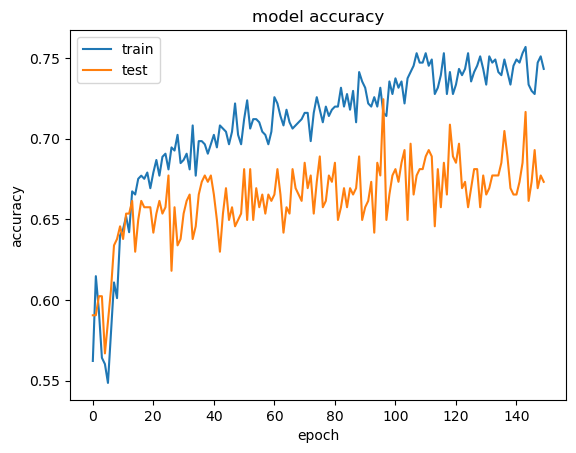

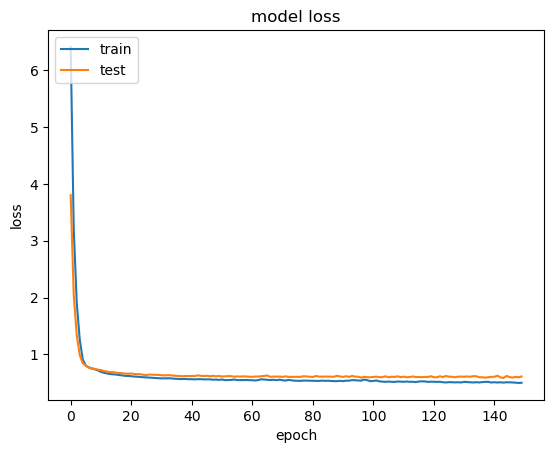

In [9]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt(FILENAME, delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
  # create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation= 'relu' ))
model.add(Dense(8, activation= 'relu' ))
model.add(Dense(1,activation= 'sigmoid' ))
 # Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam', metrics=[ 'accuracy' ])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train','test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

## Reduce Overfitting With Dropout Regularization

### Dropout is a technique where randomly selected neurons are ignored during training. They are dropped-out randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

### As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliant on context for a neuron during training is referred to as complex co-adaptations. You can imagine that if neurons are randomly dropped out of the network during training, that other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.
### The eject is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.


* Generally use a small dropout value of 20%-50% of neurons with 20% providing a good starting point. A probability too low has minimal e↵ect and a value too high results in under-learning by the network.
* Use a larger network. You are likely to get better performance when dropout is used on a larger network, giving the model more of an opportunity to learn independent representations
* Use dropout on input (visible) as well as hidden layers. Application of dropout at each layer of the network has shown good results.
* Use a large learning rate with decay and a large momentum. Increase your learning rate by a factor of 10 to 100 and use a high momentum value of 0.9 or 0.99.
* Constrain the size of network weights. A large learning rate can result in very large network weights. Imposing a constraint on the size of network weights such as max-norm regularization with a size of 4 or 5 has been shown to improve results.

## Lift Performance With Learning Rate Schedules

### Time-Based Learning Rate Schedule

### LearningRate = LearningRate X (1/ 1+ decay X epoch)

In [ ]:
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs

# sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

## Drop-Based Learning Rate Decay

In [ ]:
import math
# learning rate schedule
def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

* Increase the initial learning rate. Because the learning rate will decrease, start with a larger value to decrease from. A larger learning rate will result in a lot larger changes to the weights, at least in the beginning, allowing you to benefit from fine tuning later.
* Use a large momentum. Using a larger momentum value will help the optimization algorithm to continue to make updates in the right direction when your learning rate shrinks to small values.
* Experiment with di↵erent schedules. It will not be clear which learning rate schedule to use so try a few with di↵erent configuration options and see what works best on your problem. Also try schedules that change exponentially and even schedules that respond to the accuracy of your model on the training or test datasets.

## Word Embeddings

In [6]:
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# truncate and pad input sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2


2024-04-09 19:22:57.639732: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


196/196 [==============================] - 6s 28ms/step - loss: 0.4727 - accuracy: 0.7442 - val_loss: 0.2987 - val_accuracy: 0.8718
Epoch 2/2
196/196 [==============================] - 6s 30ms/step - loss: 0.1692 - accuracy: 0.9373 - val_loss: 0.3185 - val_accuracy: 0.8734
Accuracy: 87.34%
